In [88]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("/Users/anastasia/Downloads/saas_sql_data.db")

query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, conn)
print(tables)

              name
0      sales_table
1  customers_table


In [90]:
query = """
SELECT 
    Region,
    SUM(ARR) AS Total_ARR,
    SUM(MRR) AS Total_MRR
FROM sales_table
GROUP BY Region
ORDER BY Total_ARR DESC;
"""

# Execute the query and load results into a Pandas DataFrame
regional_revenue = pd.read_sql_query(query, conn)
print(regional_revenue)


          Region  Total_ARR  Total_MRR
0          LATAM    7750862     566616
1           APAC    6511701     467304
2  North America    6388621     552777
3           EMEA    5783260     480797


In [92]:
query = """
SELECT name FROM sqlite_master WHERE type='table';
"""
tables = pd.read_sql_query(query, conn)
print("Available Tables:\n", tables)

# Loop through all tables and print their column info
for table_name in tables['name']:
    print(f"\nSchema for table: {table_name}")
    schema_query = f"PRAGMA table_info({table_name});"
    schema = pd.read_sql_query(schema_query, conn)
    print(schema)


Available Tables:
               name
0      sales_table
1  customers_table

Schema for table: sales_table
   cid         name       type  notnull dflt_value  pk
0    0     Sales_ID       TEXT        0       None   0
1    1       Region       TEXT        0       None   0
2    2      Product       TEXT        0       None   0
3    3  Customer_ID       TEXT        0       None   0
4    4          ARR    INTEGER        0       None   0
5    5          MRR    INTEGER        0       None   0
6    6    Sale_Date  TIMESTAMP        0       None   0

Schema for table: customers_table
   cid              name     type  notnull dflt_value  pk
0    0       Customer_ID     TEXT        0       None   0
1    1     Customer_Name     TEXT        0       None   0
2    2            Region     TEXT        0       None   0
3    3  Customer_Segment     TEXT        0       None   0
4    4  Engagement_Score  INTEGER        0       None   0


In [94]:
query = """
SELECT
    customers_table.Customer_Segment,
    SUM(sales_table.ARR) AS Total_ARR,
    AVG(customers_table.Engagement_Score) AS Avg_Engagement_Score
FROM sales_table
LEFT JOIN customers_table
ON sales_table.Customer_ID = customers_table.Customer_ID
GROUP BY customers_table.Customer_Segment
ORDER BY Total_ARR DESC;
"""

segment_analysis = pd.read_sql_query(query, conn)
print("\nCustomer Segment Analysis:")
print(segment_analysis)


Customer Segment Analysis:
  Customer_Segment  Total_ARR  Avg_Engagement_Score
0       Enterprise    9675356             74.281768
1        Strategic    6346111             71.328244
2              SMB    5577551             80.390000
3       Commercial    4835426             73.215909


In [96]:
query = """
SELECT customers_table.Customer_Segment,
COUNT(DISTINCT sales_table.Customer_ID) AS Total_Customers,
SUM(sales_table.ARR) AS Total_ARR,
SUM(sales_table.ARR) / COUNT(DISTINCT sales_table.Customer_ID) AS Avg_ARR_Per_Customer
FROM sales_table
LEFT JOIN customers_table
ON sales_table.Customer_ID = customers_table.Customer_ID
GROUP BY customers_table.Customer_Segment
ORDER BY Avg_ARR_Per_Customer DESC;
"""

segment_avg = pd.read_sql_query(query, conn)
print(f"Average ARR per Customer by Segment: \n\n {segment_avg}")

Average ARR per Customer by Segment: 

   Customer_Segment  Total_Customers  Total_ARR  Avg_ARR_Per_Customer
0       Enterprise               57    9675356                169743
1       Commercial               35    4835426                138155
2              SMB               42    5577551                132798
3        Strategic               48    6346111                132210


In [98]:
query = """
SELECT
    sales_table.Product,
    customers_table.Customer_Segment,
    SUM(sales_table.ARR) AS Total_ARR
FROM sales_table
LEFT JOIN customers_table
ON sales_table.Customer_ID = customers_table.Customer_ID
GROUP BY sales_table.Product, customers_table.Customer_Segment
ORDER BY Total_ARR DESC;
"""

prod_seg = pd.read_sql_query(query, conn)
print(f"Total ARR by Product and Customer Segment: \n\n {prod_seg}")

Total ARR by Product and Customer Segment: 

             Product Customer_Segment  Total_ARR
0    Cloud Platform       Enterprise    3604891
1    Security Suite       Enterprise    3547708
2   Developer Tools       Enterprise    2522757
3    Cloud Platform        Strategic    2294375
4   Developer Tools              SMB    2222660
5   Developer Tools        Strategic    2049746
6    Security Suite        Strategic    2001990
7    Security Suite       Commercial    1886819
8    Cloud Platform       Commercial    1820090
9    Cloud Platform              SMB    1725225
10   Security Suite              SMB    1629666
11  Developer Tools       Commercial    1128517


In [100]:
# Goal: Analyze Total ARR and Average Engagement Score by Customer Segment and Region.

query = """
SELECT
    customers_table.Customer_Segment,
    sales_table.Region,
    SUM(sales_table.ARR) AS Total_ARR,
    AVG(customers_table.Engagement_Score) AS Avg_Engagement_Score
FROM sales_table
LEFT JOIN customers_table
ON sales_table.Customer_ID = customers_table.Customer_ID
GROUP BY customers_table.Region, customers_table.Customer_Segment
ORDER BY Total_ARR DESC;
"""

seg_reg = pd.read_sql_query(query, conn)
print(f"Total ARR and Avg Engagement by Customer Segment and Region: \n\n {seg_reg}")

Total ARR and Avg Engagement by Customer Segment and Region: 

    Customer_Segment         Region  Total_ARR  Avg_Engagement_Score
0        Enterprise  North America    3253717             75.596774
1        Enterprise           APAC    2739749             73.071429
2         Strategic           APAC    2155708             64.638298
3        Enterprise           EMEA    1874584             73.531250
4               SMB           APAC    1852088             82.676471
5        Enterprise  North America    1807306             74.612903
6        Commercial          LATAM    1678828             68.218750
7         Strategic           APAC    1536660             70.566667
8         Strategic          LATAM    1468006             77.423077
9               SMB           EMEA    1443787             77.692308
10       Commercial           APAC    1278804             81.800000
11        Strategic           EMEA    1185737             77.714286
12              SMB          LATAM    1160462       

In [102]:
# Looking at ARR over time - converting sale date into monthly data.
query = """
SELECT 
    strftime('%Y-%m', Sale_Date) AS Month,
    SUM(ARR) AS Total_ARR
FROM sales_table
GROUP BY
    Month
ORDER BY
    Month;
"""

ARR_over_time = pd.read_sql_query(query, conn)
print(f"ARR Trend over 16 Months:\n\n {ARR_over_time}")


ARR Trend over 16 Months:

       Month  Total_ARR
0   2023-01    1487268
1   2023-02    1415149
2   2023-03    1756852
3   2023-04    1652746
4   2023-05    1504807
5   2023-06    1546823
6   2023-07    1645402
7   2023-08    1801675
8   2023-09    1334610
9   2023-10    1818490
10  2023-11    1538693
11  2023-12    1663295
12  2024-01    1676253
13  2024-02    1642467
14  2024-03    1640515
15  2024-04    1514578
16  2024-05     794821


In [104]:
# Analyze monthly ARR trends by region to understand how revenue is distributed over time across different regions.

region_arr_query = """
SELECT
    strftime('%Y-%m', Sale_Date) AS Month,
    Region,
    SUM(ARR) AS Total_ARR
FROM sales_table
GROUP BY
    Month, Region
ORDER BY
    Month, Region;
"""

region_ARR = pd.read_sql_query(region_arr_query, conn)
print(f"ARR by Region Over Time:\n\n {region_ARR}")

ARR by Region Over Time:

       Month         Region  Total_ARR
0   2023-01           APAC     437108
1   2023-01           EMEA     241825
2   2023-01          LATAM     521311
3   2023-01  North America     287024
4   2023-02           APAC     370730
..      ...            ...        ...
63  2024-04  North America     467686
64  2024-05           APAC     174191
65  2024-05           EMEA      44214
66  2024-05          LATAM     216762
67  2024-05  North America     359654

[68 rows x 3 columns]


In [106]:
lag_query = """
SELECT
    Month,
    Region,
    Total_ARR,
    LAG(Total_ARR) OVER (PARTITION BY Region ORDER BY Month) AS Prev_ARR
FROM  (
    SELECT
        strftime('%Y-%m', Sale_Date) AS Month,
        Region,
        SUM(ARR) AS Total_ARR
    FROM
        sales_table
    GROUP BY
        Month, Region
    )
ORDER BY
    Month, Region;
"""

arr_with_lag = pd.read_sql_query(lag_query, conn)
display(arr_with_lag)

,Month,Region,Total_ARR,Prev_ARR
0,2023-01,APAC,437108,NaN
1,2023-01,EMEA,241825,NaN
2,2023-01,LATAM,521311,NaN
3,2023-01,North America,287024,NaN
4,2023-02,APAC,370730,437108.0
...,...,...,...,...
63,2024-04,North America,467686,432426.0
64,2024-05,APAC,174191,187444.0
65,2024-05,EMEA,44214,384849.0
66,2024-05,LATAM,216762,474599.0


In [108]:
# Using pd to add a Month over Month growth rate

arr_with_lag["MoM_Growth"] = (
    (arr_with_lag["Total_ARR"] - arr_with_lag["Prev_ARR"]) / arr_with_lag["Prev_ARR"]
) * 100

arr_with_lag.tail()

,Month,Region,Total_ARR,Prev_ARR,MoM_Growth
63,2024-04,North America,467686,432426.0,8.153996
64,2024-05,APAC,174191,187444.0,-7.070378
65,2024-05,EMEA,44214,384849.0,-88.511338
66,2024-05,LATAM,216762,474599.0,-54.327337
67,2024-05,North America,359654,467686.0,-23.099259


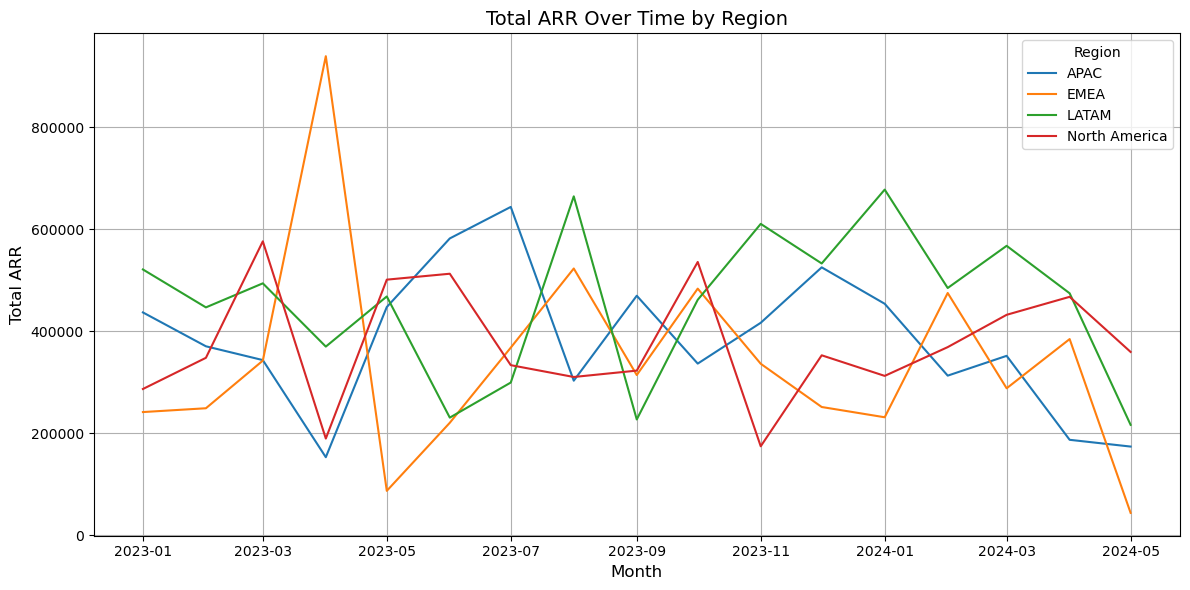

In [110]:
import matplotlib.pyplot as plt

arr_with_lag["Month"] = pd.to_datetime(arr_with_lag["Month"])

arr_with_lag = arr_with_lag.sort_values(by=["Region", "Month"])

plt.figure(figsize=(12, 6))
for region in arr_with_lag["Region"].unique():
    region_data = arr_with_lag[arr_with_lag["Region"] == region]
    plt.plot(region_data["Month"], region_data["Total_ARR"], label=region)

plt.title("Total ARR Over Time by Region", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total ARR", fontsize=12)
plt.legend(title="Region")
plt.grid(True)
plt.tight_layout()
plt.show()


In [113]:
arr_with_lag["Cumulative_ARR"] = arr_with_lag.groupby("Region")["Total_ARR"].cumsum()
display(arr_with_lag.head())

,Month,Region,Total_ARR,Prev_ARR,MoM_Growth,Cumulative_ARR
0,2023-01-01,APAC,437108,NaN,NaN,437108
4,2023-02-01,APAC,370730,437108.0,-15.185721,807838
8,2023-03-01,APAC,343690,370730.0,-7.293718,1151528
12,2023-04-01,APAC,153333,343690.0,-55.386249,1304861
16,2023-05-01,APAC,447678,153333.0,191.964548,1752539


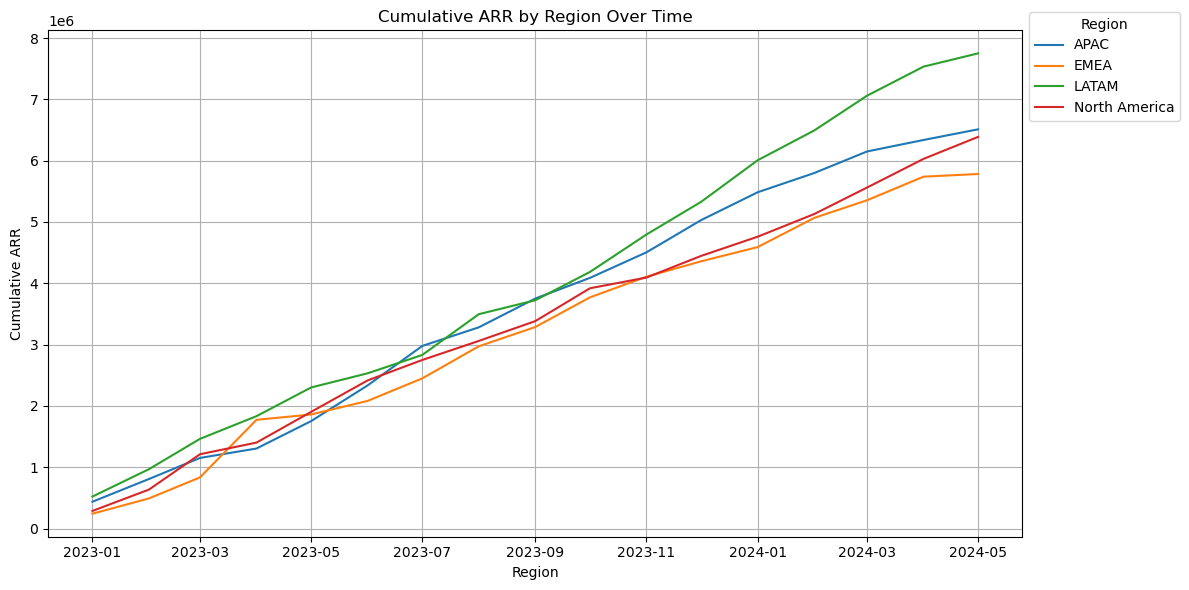

In [119]:
plt.figure(figsize=(12,6))
for region in arr_with_lag["Region"].unique():
    region_data = arr_with_lag[arr_with_lag["Region"] == region]
    plt.plot(region_data["Month"], region_data["Cumulative_ARR"], label=region)

plt.title("Cumulative ARR by Region Over Time")
plt.xlabel("Region")
plt.ylabel("Cumulative ARR")
plt.legend(title="Region", bbox_to_anchor=(1,1.05))
plt.grid(True)
plt.tight_layout()
plt.show()

In [125]:
reg_seg_arr_query = """
    SELECT 
        sales_table.Region,
        customers_table.Customer_Segment,
        SUM(sales_table.ARR) AS Total_ARR,
        AVG(customers_table.Engagement_Score) AS Avg_Engagement_Score
FROM sales_table
LEFT JOIN customers_table
ON sales_table.Customer_ID = customers_table.Customer_ID
GROUP BY sales_table.Region, customers_table.Customer_Segment
ORDER BY Total_ARR DESC;
"""

reg_seg_arr = pd.read_sql_query(reg_seg_arr_query, conn)
print(f"ARR by Region and Customer Segment:\n\n {reg_seg_arr}")

ARR by Region and Customer Segment:

            Region Customer_Segment  Total_ARR  Avg_Engagement_Score
0           LATAM       Enterprise    2833167             74.089286
1            EMEA       Enterprise    2588807             74.023256
2            APAC       Enterprise    2217218             73.177778
3   North America       Enterprise    2036164             76.216216
4            APAC        Strategic    2015882             74.028571
5   North America        Strategic    2000015             71.975000
6           LATAM              SMB    1880072             78.206897
7           LATAM       Commercial    1648449             78.419355
8           LATAM        Strategic    1389174             71.562500
9   North America              SMB    1309497             85.040000
10           APAC              SMB    1241720             78.869565
11           EMEA              SMB    1146262             79.608696
12           EMEA       Commercial    1107151             72.055556
13  North 

In [139]:
# Top Products by ARR & Segment

product_segment_ARR_query = """
SELECT
    sales_table.Product AS Product,
    customers_table.Customer_Segment AS "Customer Segment",
    SUM(sales_table.ARR) AS "Total ARR"
FROM sales_table
LEFT JOIN customers_table
ON sales_table.Customer_ID = customers_table.Customer_ID
GROUP BY
    sales_table.Product, customers_table.Customer_Segment
ORDER BY "Customer Segment", "Total ARR" DESC;
"""
product_segment_arr = pd.read_sql_query(product_segment_ARR_query, conn)
display(product_segment_arr)

,Product,Customer Segment,Total ARR
0,Security Suite,Commercial,1886819
1,Cloud Platform,Commercial,1820090
2,Developer Tools,Commercial,1128517
3,Cloud Platform,Enterprise,3604891
4,Security Suite,Enterprise,3547708
5,Developer Tools,Enterprise,2522757
6,Developer Tools,SMB,2222660
7,Cloud Platform,SMB,1725225
8,Security Suite,SMB,1629666
9,Cloud Platform,Strategic,2294375


In [145]:
# Churn risk analysis - find low engagement high ARR segments

churn_risk_query = """
SELECT 
    customers_table.Customer_Segment AS "Customer Segment",
    AVG(customers_table.Engagement_Score) AS "Average Engagement Score",
    SUM(sales_table.ARR) AS "Total ARR"
FROM
    sales_table
LEFT JOIN
    customers_table
ON
    sales_table.Customer_ID = customers_table.Customer_ID
GROUP BY
    "Customer Segment"
HAVING
    "Average Engagement Score" < 80
ORDER BY
    "Total ARR" DESC;
"""

churn_risk_seg = pd.read_sql_query(churn_risk_query, conn)
display(churn_risk_seg)

,Customer Segment,Average Engagement Score,Total ARR
0,Enterprise,74.281768,9675356
1,Strategic,71.328244,6346111
2,Commercial,73.215909,4835426


In [170]:
# churn risk analysis for individual customers

customer_churn_query = """
SELECT
    customers_table.Customer_ID AS "Customer ID",
    customers_table.Customer_Name AS "Customer Name",
    customers_table.Customer_Segment AS "Customer_Segment",
    customers_table.Region AS Region,
    customers_table.Engagement_Score AS "Engagement Score",
    sales_table.Product AS Product,
    sales_table.ARR AS ARR
FROM
    customers_table
LEFT JOIN
    sales_table
ON
    customers_table.Customer_ID = sales_table.Customer_ID
WHERE
    "Engagement Score" < 70
ORDER BY
    ARR DESC;
"""

customer_churn_df = pd.read_sql_query(customer_churn_query, conn)
display(customer_churn_df)

,Customer ID,Customer Name,Customer_Segment,Region,Engagement Score,Product,ARR
0,C0046,Customer_46,Commercial,LATAM,65,Cloud Platform,99377.0
1,C0118,Customer_118,Enterprise,EMEA,50,Developer Tools,99006.0
2,C0067,Customer_67,SMB,APAC,56,Developer Tools,98623.0
3,C0135,Customer_135,Commercial,EMEA,66,Security Suite,97241.0
4,C0128,Customer_128,Enterprise,LATAM,60,Cloud Platform,97124.0
...,...,...,...,...,...,...,...
185,C0116,Customer_116,SMB,LATAM,58,None,NaN
186,C0167,Customer_167,Enterprise,LATAM,56,None,NaN
187,C0174,Customer_174,Enterprise,North America,57,None,NaN
188,C0186,Customer_186,Strategic,North America,58,None,NaN


In [172]:
customer_churn_region_segment = customer_churn_df.groupby(["Region", "Customer_Segment", "Product"]).agg(
    Total_ARR=("ARR", "sum"),
    Avg_Engagement=("Engagement Score", "mean"),
    Total_Customers=("Customer ID", "count")
)
display(customer_churn_region_segment)

Total_ARR  Avg_Engagement  \
Region        Customer_Segment Product                                      
APAC          Commercial       Cloud Platform    268994.0       56.500000   
                               Developer Tools   159743.0       62.500000   
                               Security Suite    333823.0       59.500000   
              Enterprise       Cloud Platform    567834.0       55.636364   
                               Developer Tools   109785.0       57.333333   
                               Security Suite    433941.0       54.666667   
              SMB              Cloud Platform    135949.0       56.500000   
                               Developer Tools   185494.0       56.000000   
                               Security Suite    111351.0       56.500000   
              Strategic        Cloud Platform    711282.0       58.533333   
                               Developer Tools   464032.0       54.500000   
                               Security Suite    295435.0       56.833333   
EMEA          Commercial       Cloud Platform     63139.0       57.500000   
                               Developer Tools   303153.0       59.200000   
                               Security Suite    435264.0       56.666667   
              Enterprise       Cloud Platform    206519.0       61.375000   
                               Developer Tools   363197.0       56.600000   
                               Security Suite    271815.0       59.666667   
              SMB              Cloud Platform    116547.0       63.000000   
                               Developer Tools    98435.0       62.333333   
                               Security Suite    327169.0       66.250000   
              Strategic        Cloud Platform    195415.0       55.000000   
                               Developer Tools   202252.0       56.000000   
                               Security Suite    135507.0       60.500000   
LATAM         Commercial       Cloud Platform    197322.0       61.000000   
                               Developer Tools    91143.0       65.000000   
              Enterprise       Cloud Platform    155803.0       61.333333   
                               Developer Tools   237162.0       63.500000   
                               Security Suite    116176.0       64.000000   
              SMB              Cloud Platform     22602.0       68.000000   
                               Developer Tools   126243.0       68.000000   
                               Security Suite     12491.0       51.000000   
              Strategic        Cloud Platform    127093.0       55.000000   
                               Developer Tools   134510.0       57.000000   
North America Commercial       Cloud Platform     52517.0       66.000000   
                               Security Suite    217840.0       61.500000   
              Enterprise       Cloud Platform    261558.0       58.000000   
                               Developer Tools   125599.0       64.250000   
                               Security Suite    317871.0       59.500000   
              SMB              Developer Tools   180502.0       59.750000   
              Strategic        Cloud Platform     26520.0       64.000000   
                               Developer Tools    18350.0       64.000000   
                               Security Suite    251678.0       64.500000   

                                                Total_Customers  
Region        Customer_Segment Product                           
APAC          Commercial       Cloud Platform                 4  
                               Developer Tools                4  
                               Security Suite                 6  
              Enterprise       Cloud Platform                11  
                               Developer Tools                3  
                               Security Suite                 9  
              SMB              Cloud Platform         

In [174]:
high_risk_segments = customer_churn_region_segment.sort_values(by="Total_ARR", ascending=False)
display(high_risk_segments.head())

Total_ARR  Avg_Engagement  \
Region Customer_Segment Product                                      
APAC   Strategic        Cloud Platform    711282.0       58.533333   
       Enterprise       Cloud Platform    567834.0       55.636364   
       Strategic        Developer Tools   464032.0       54.500000   
EMEA   Commercial       Security Suite    435264.0       56.666667   
APAC   Enterprise       Security Suite    433941.0       54.666667   

                                         Total_Customers  
Region Customer_Segment Product                           
APAC   Strategic        Cloud Platform                15  
       Enterprise       Cloud Platform                11  
       Strategic        Developer Tools               10  
EMEA   Commercial       Security Suite                 9  
APAC   Enterprise       Security Suite                 9

In [176]:
high_risk_APAC_strat = customer_churn_df[
    (customer_churn_df["Region"] == "APAC") &
    (customer_churn_df["Customer_Segment"] == "Strategic")
]
high_risk_APAC_strat = high_risk_APAC_strat.sort_values(by="ARR", ascending=False)
display(high_risk_APAC_strat)

,Customer ID,Customer Name,Customer_Segment,Region,Engagement Score,Product,ARR
15,C0028,Customer_28,Strategic,APAC,59,Developer Tools,91145.0
21,C0151,Customer_151,Strategic,APAC,50,Cloud Platform,88441.0
25,C0026,Customer_26,Strategic,APAC,68,Security Suite,86994.0
29,C0157,Customer_157,Strategic,APAC,54,Developer Tools,85435.0
33,C0026,Customer_26,Strategic,APAC,68,Cloud Platform,83344.0
38,C0034,Customer_34,Strategic,APAC,64,Cloud Platform,80039.0
42,C0081,Customer_81,Strategic,APAC,50,Cloud Platform,79532.0
43,C0151,Customer_151,Strategic,APAC,50,Developer Tools,79182.0
46,C0005,Customer_5,Strategic,APAC,53,Cloud Platform,78543.0
57,C0005,Customer_5,Strategic,APAC,53,Security Suite,66665.0


In [186]:
APAC_product_risk = high_risk_APAC_strat.groupby("Product").agg(
    Total_Customers=("Customer ID", "count"),
    Total_ARR=("ARR", "sum"),
    Avg_Engagement=("Engagement Score", "mean")
).sort_values(by="Total_ARR", ascending=False)
display(APAC_product_risk)

,Total_Customers,Total_ARR,Avg_Engagement
Product,,,
Cloud Platform,15,711282.0,58.533333
Developer Tools,10,464032.0,54.500000
Security Suite,6,295435.0,56.833333


In [196]:
# Analyse ARR trends across multiple levels: Region, Segment, Product

rsp_query = """
SELECT
    sales_table.Region AS Region,
    sales_table.Product AS Product,
    customers_table.Customer_Segment AS Segment,
    SUM(sales_table.ARR) AS Total_ARR,
    AVG(customers_table.Engagement_Score) AS Avg_Engagement
FROM
    sales_table
LEFT JOIN
    customers_table
ON
    sales_table.Customer_ID = customers_table.Customer_ID
GROUP BY
    sales_table.Region, customers_table.Customer_Segment, Product
ORDER BY
    Total_ARR DESC
"""

rsp = pd.read_sql_query(rsp_query, conn)
display(rsp)

,Region,Product,Segment,Total_ARR,Avg_Engagement
0,EMEA,Security Suite,Enterprise,1430521,75.545455
1,LATAM,Cloud Platform,Enterprise,1417753,71.321429
2,LATAM,Developer Tools,SMB,1103260,78.250000
3,APAC,Security Suite,Enterprise,879217,74.631579
4,North America,Security Suite,Strategic,851587,75.785714
5,APAC,Cloud Platform,Strategic,814959,75.333333
6,LATAM,Cloud Platform,Commercial,811648,82.461538
7,LATAM,Developer Tools,Enterprise,778883,81.846154
8,North America,Cloud Platform,Enterprise,762688,78.600000
9,EMEA,Cloud Platform,Enterprise,762017,69.230769


In [220]:
ranked_query = """
WITH Ranked_Customers AS (
    SELECT
        customers_table.Customer_ID,
        customers_table.Customer_Name,
        sales_table.Region,
        SUM(sales_table.ARR) AS Total_ARR,
        RANK () OVER (PARTITION BY sales_table.Region ORDER BY SUM(sales_table.ARR) DESC) AS Rank
    FROM
        sales_table
    LEFT JOIN
        customers_table
    ON
        sales_table.Customer_ID = customers_table.Customer_ID
    GROUP BY
        customers_table.Customer_ID, customers_table.Customer_Name, sales_table.Region
)
SELECT
    Customer_ID,
    Customer_Name,
    Region,
    Total_ARR
FROM
    Ranked_Customers
WHERE
    Rank <= 5
GROUP BY
    Region, Rank;
"""

ranked_df = pd.read_sql_query(ranked_query, conn)
display(ranked_df)



,Customer_ID,Customer_Name,Region,Total_ARR
0,C0152,Customer_152,APAC,245246
1,C0155,Customer_155,APAC,206437
2,C0046,Customer_46,APAC,190520
3,C0026,Customer_26,APAC,170338
4,C0115,Customer_115,APAC,162564
5,C0068,Customer_68,EMEA,179798
6,C0064,Customer_64,EMEA,171871
7,C0047,Customer_47,EMEA,168099
8,C0032,Customer_32,EMEA,165716
9,C0198,Customer_198,EMEA,163233


In [226]:
ranked_df.sort_values(by="Total_ARR", ascending=False)

,Customer_ID,Customer_Name,Region,Total_ARR
10,C0001,Customer_1,LATAM,312017
15,C0104,Customer_104,North America,267277
16,C0179,Customer_179,North America,246907
0,C0152,Customer_152,APAC,245246
1,C0155,Customer_155,APAC,206437
2,C0046,Customer_46,APAC,190520
11,C0141,Customer_141,LATAM,188863
12,C0104,Customer_104,LATAM,184376
17,C0061,Customer_61,North America,181822
5,C0068,Customer_68,EMEA,179798
